# Regression

In [1]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

# These are some parameters to make figures nice (and big)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 16,8
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
# Define the true process
nsample = 100
beta_true = np.array([10, 1])
var_eps=3

# generate data
x = np.linspace(0, 10, nsample)
e = stats.norm(loc=0,scale=var_eps).rvs(size=nsample)
#e = stats.cauchy(loc=0,scale=1).rvs(size=nsample)
y_true=np.dot(X, beta_true)
y = y_true + e


print('R2_true=',np.var(y_true)/(np.var(y_true)+var_eps))
print('beta_0=',beta_true[0],',  beta_1=',beta_true[1])
print(res.summary())


fig,ax=plt.subplots(1,1,figsize=[12,12])

ax.plot(x,y,'o')
ax.set_xlabel('x')
ax.set_ylabel('y')
# Define the true process
nsample = 100
beta_true = np.array([10, 1])
var_eps=3


x = np.linspace(0, 10, nsample)
e = stats.norm(loc=0,scale=var_eps).rvs(size=nsample)
X = sm.add_constant(x)
y_true=np.dot(X, beta_true)
y = y_true + e


NameError: name 'X' is not defined

R2_true= 0.8031809145129225
beta_0= 10.0 ,  beta_1= 1.2
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     46.05
Date:                Fri, 17 Sep 2021   Prob (F-statistic):           8.85e-10
Time:                        09:37:00   Log-Likelihood:                -315.00
No. Observations:                 100   AIC:                             634.0
Df Residuals:                      98   BIC:                             639.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

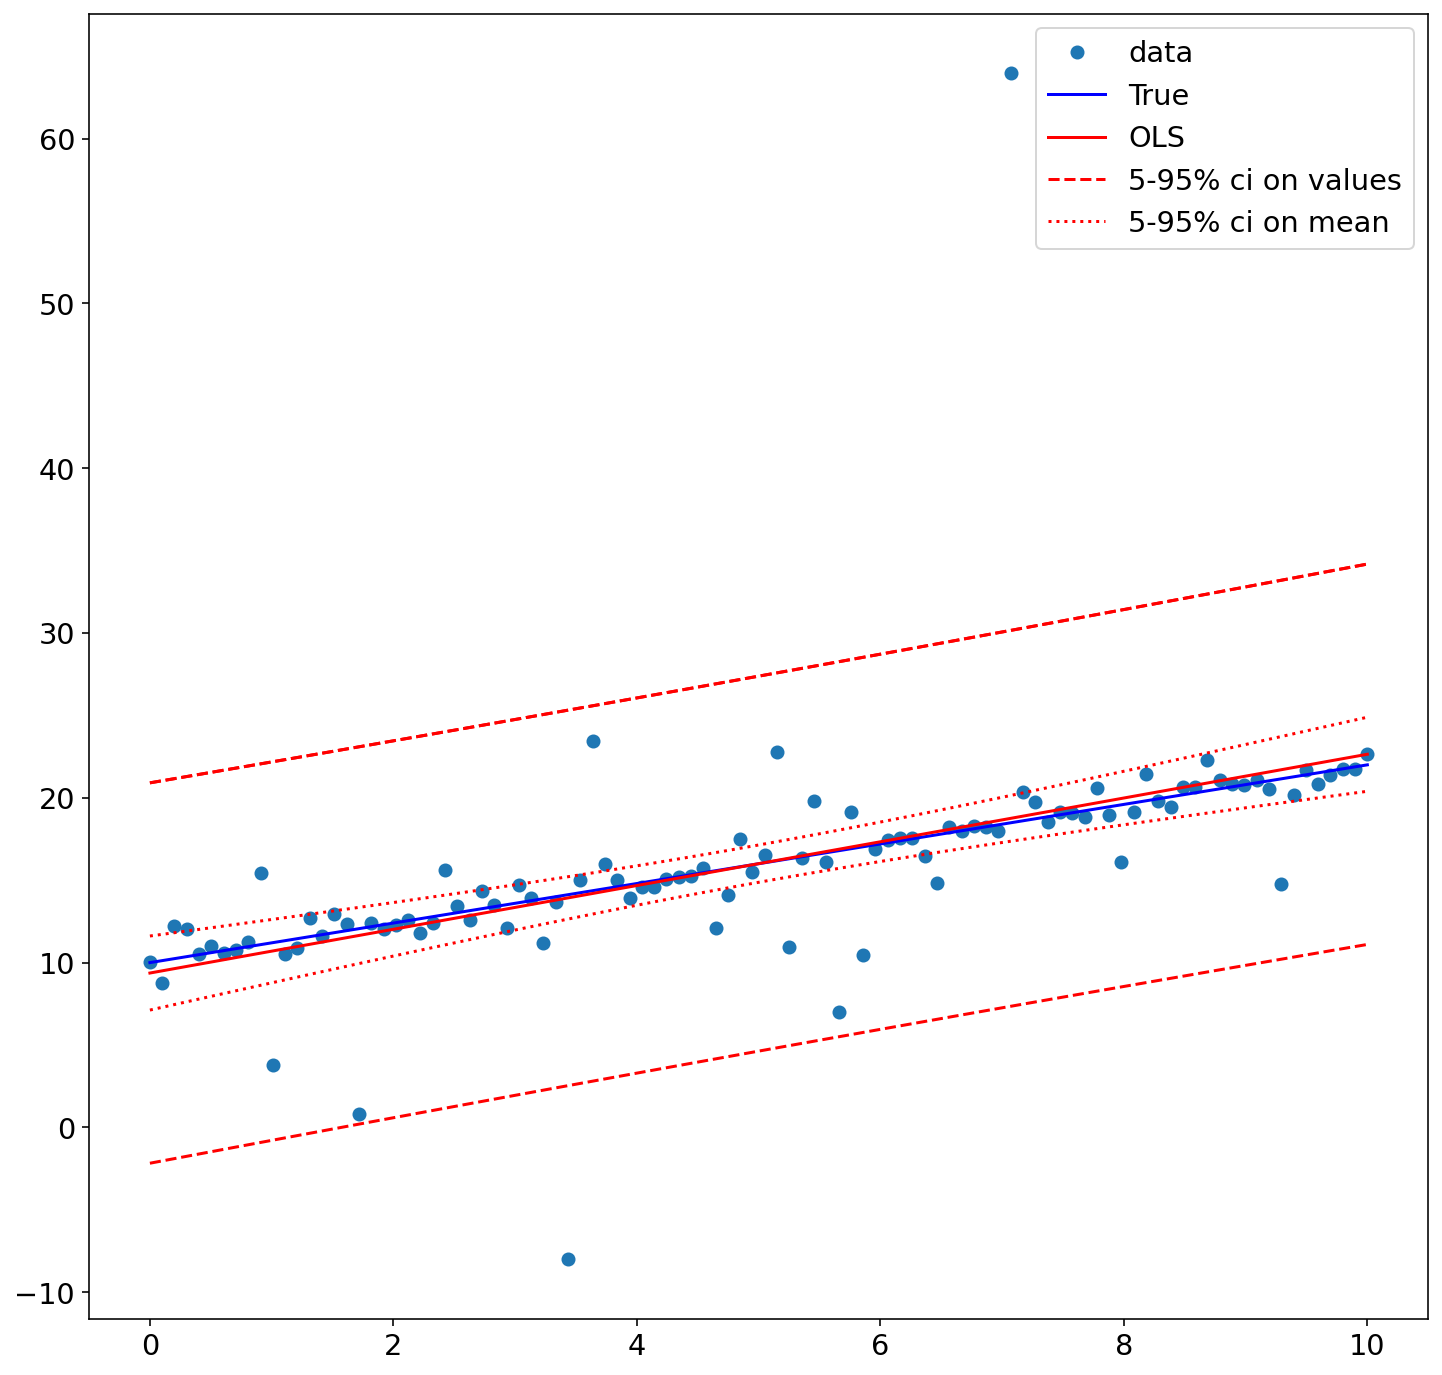

In [49]:
# Define the true process
nsample = 100
beta_true = np.array([10, 1.2])
var_eps=3

# generate data
x = np.linspace(0, 10, nsample)
#e = stats.norm(loc=0,scale=var_eps).rvs(size=nsample)
e = stats.cauchy(loc=0,scale=0.5).rvs(size=nsample)

X = sm.add_constant(x)
y_true=np.dot(X, beta_true)
y = y_true + e


print('R2_true=',np.var(y_true)/(np.var(y_true)+var_eps))
print('beta_0=',beta_true[0],',  beta_1=',beta_true[1])

model = sm.OLS(y, X)
res = model.fit()
print(res.summary())


st, data, ss2 = summary_table(res, alpha=0.05)
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T


fig,ax=plt.subplots(1,1,figsize=[12,12])
pred_ols = res.get_prediction()
#iv_l = pred_ols.summary_frame()["obs_ci_lower"]
#iv_u = pred_ols.summary_frame()["obs_ci_upper"]

ax.plot(x, y,'o', label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, fittedvalues, 'r-', label='OLS')
ax.plot(x, predict_ci_low, 'r--')
ax.plot(x, predict_ci_upp, 'r--',label='5-95% ci on values')
ax.plot(x, predict_ci_upp, 'r--')
ax.plot(x, predict_mean_ci_low, 'r:',label='5-95% ci on mean')
ax.plot(x, predict_mean_ci_upp, 'r:')
ax.legend(loc="best")


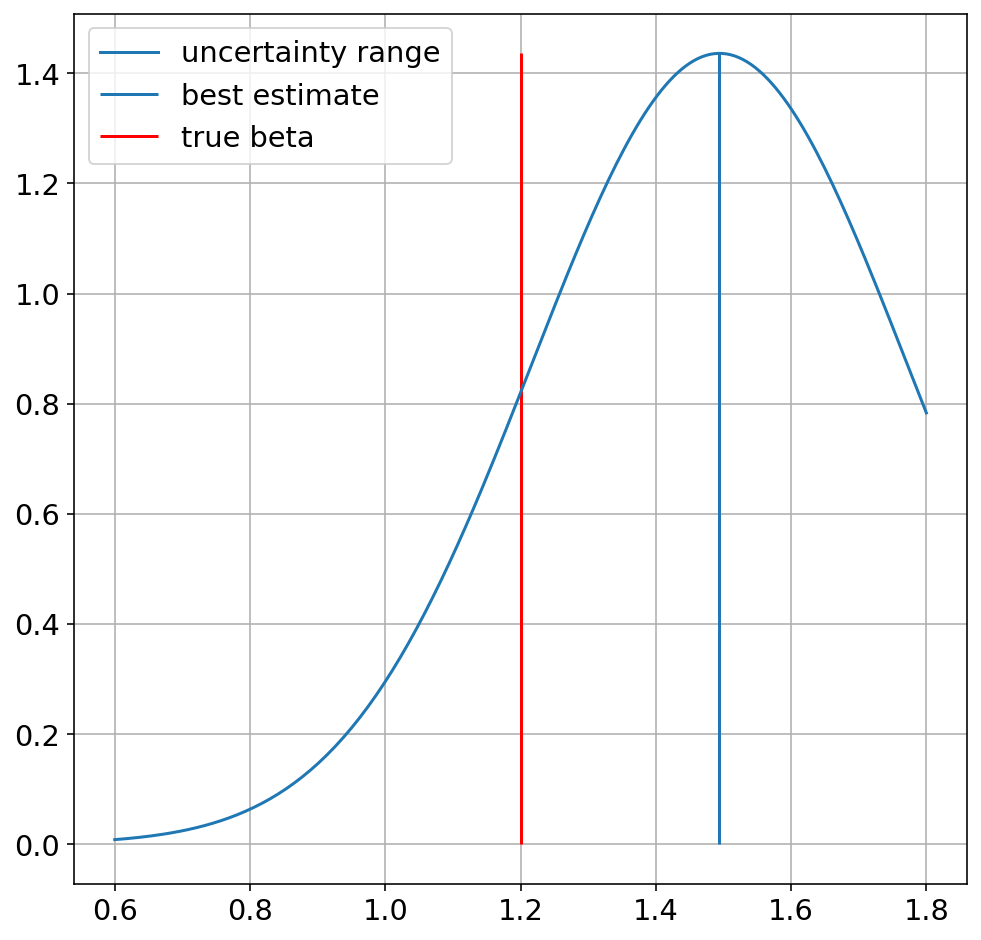

In [48]:
fig,ax=plt.subplots(1,1,figsize=[8,8])

x=np.linspace(0.2,1,200)
beta_hat=res.params[1]

pdf=stats.norm.pdf(x,loc=beta_hat,scale=res.bse[1])
ax.plot(x,pdf,label='uncertainty range')
ax.vlines(beta_hat,0,np.max(pdf),label='best estimate')
ax.vlines(beta_true[1],0,np.max(pdf),'r',label='true beta')
ax.legend()
ax.grid()

In [39]:
Ndraws=100000
q=np.zeros(Ndraws)

for n in range(Ndraws):

    # generate data
    x = np.linspace(0, 10, nsample)
    #e = stats.norm(loc=0,scale=var_eps).rvs(size=nsample)
    e = stats.cauchy(loc=0,scale=1).rvs(size=nsample)
    X = sm.add_constant(x)
    y_true=np.dot(X, beta_true)
    y = y_true + e

    model = sm.OLS(y, X)
    res = model.fit()

    beta_hat=res.params[1]
    stderr=res.bse[1]
    q[n]=stats.norm.cdf(beta_true[1], loc=beta_hat, scale=stderr)

In [42]:
np.shape(q[q<0.05])[0]/Ndraws*100


4.625

In [50]:
Ndraws=1000
q=np.zeros(Ndraws)
beta_true[1]=0
for n in range(Ndraws):
    # generate data

    x = np.linspace(0, 10, nsample)
    e = stats.norm(loc=0,scale=20).rvs(size=nsample)
    #e = stats.cauchy(loc=0,scale=1).rvs(size=nsample)
    X = sm.add_constant(x)
    y_true=np.dot(X, beta_true)
    y = y_true + e

    model = sm.OLS(y, X)
    res = model.fit()

    beta_hat=res.params[1]
    stderr=res.bse[1]
    q[n]=beta_hat

In [ ]:
q

R2_true= 0.0
beta_0= 10 ,  beta_1= 0


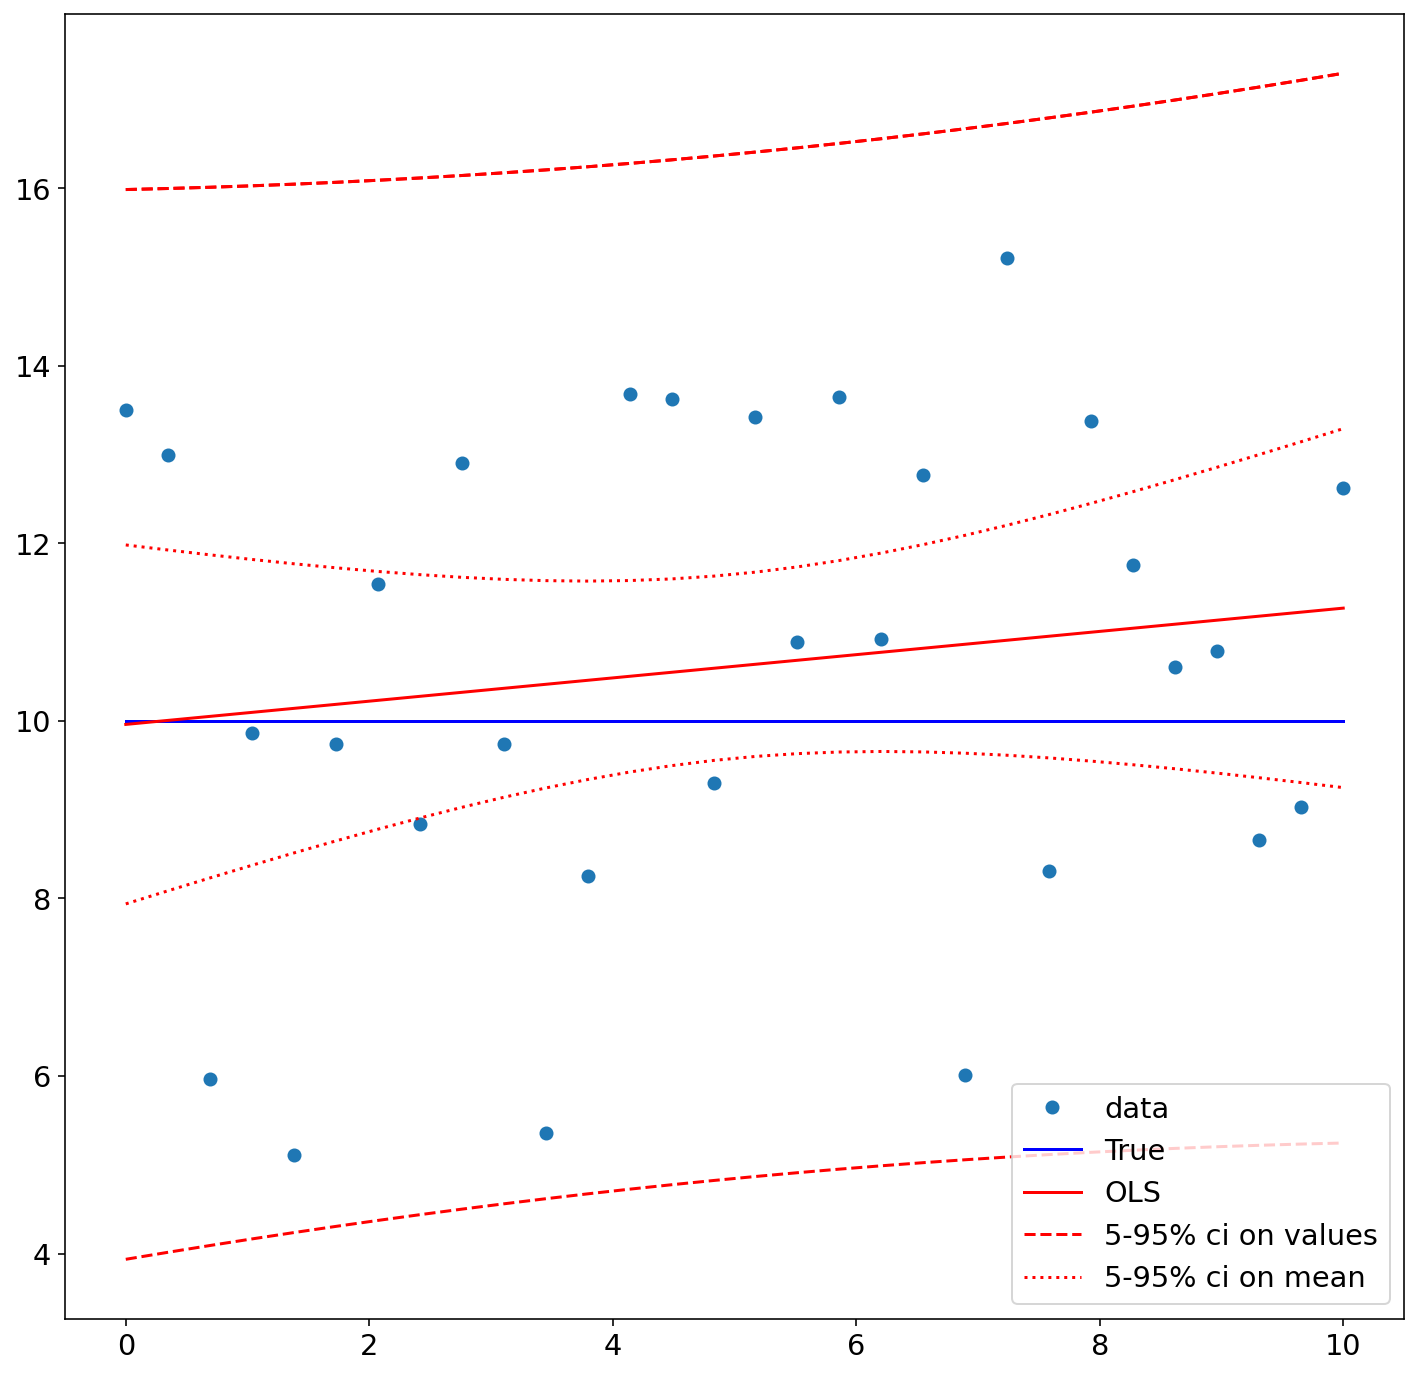

In [56]:
# Define the true process
nsample = 30
beta_true = np.array([10, 0])
var_eps=3

# generate data
x = np.linspace(0, 10, nsample)
e = stats.norm(loc=0,scale=var_eps).rvs(size=nsample)
#e = stats.cauchy(loc=0,scale=1).rvs(size=nsample)

X = sm.add_constant(x)
y_true=np.dot(X, beta_true)
y = y_true + e


print('R2_true=',np.var(y_true)/(np.var(y_true)+var_eps))
print('beta_0=',beta_true[0],',  beta_1=',beta_true[1])

model = sm.OLS(y, X)
res = model.fit()
#print(res.summary())


st, data, ss2 = summary_table(res, alpha=0.05)
fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T


fig,ax=plt.subplots(1,1,figsize=[12,12])
pred_ols = res.get_prediction()
#iv_l = pred_ols.summary_frame()["obs_ci_lower"]
#iv_u = pred_ols.summary_frame()["obs_ci_upper"]

ax.plot(x, y,'o', label="data")
ax.plot(x, y_true, "b-", label="True")
ax.plot(x, fittedvalues, 'r-', label='OLS')
ax.plot(x, predict_ci_low, 'r--')
ax.plot(x, predict_ci_upp, 'r--',label='5-95% ci on values')
ax.plot(x, predict_ci_upp, 'r--')
ax.plot(x, predict_mean_ci_low, 'r:',label='5-95% ci on mean')
ax.plot(x, predict_mean_ci_upp, 'r:')
ax.legend(loc="best")


In [57]:
Ndraws=10000
q=np.zeros(Ndraws)
beta_true[1]=0
for n in range(Ndraws):
    # generate data

    x = np.linspace(0, 10, nsample)
    e = stats.norm(loc=0,scale=20).rvs(size=nsample)
    #e = stats.cauchy(loc=0,scale=1).rvs(size=nsample)
    X = sm.add_constant(x)
    y_true=np.dot(X, beta_true)
    y = y_true + e

    model = sm.OLS(y, X)
    res = model.fit()

    beta_hat=res.params[1]
    stderr=res.bse[1]
    q[n]=beta_hat

(array([  1.,   1.,   2.,   5.,   4.,   7.,  16.,  22.,  28.,  45.,  53.,
         71., 105., 124., 169., 208., 260., 318., 345., 397., 481., 541.,
        595., 594., 610., 593., 545., 618., 536., 478., 379., 391., 309.,
        286., 191., 170., 140., 106.,  69.,  66.,  39.,  28.,  18.,  15.,
          9.,   0.,   3.,   8.,   0.,   1.]),
 array([-4.64795961, -4.46257216, -4.27718471, -4.09179726, -3.90640981,
        -3.72102236, -3.53563491, -3.35024746, -3.16486001, -2.97947256,
        -2.79408511, -2.60869766, -2.42331021, -2.23792276, -2.0525353 ,
        -1.86714785, -1.6817604 , -1.49637295, -1.3109855 , -1.12559805,
        -0.9402106 , -0.75482315, -0.5694357 , -0.38404825, -0.1986608 ,
        -0.01327335,  0.1721141 ,  0.35750155,  0.542889  ,  0.72827646,
         0.91366391,  1.09905136,  1.28443881,  1.46982626,  1.65521371,
         1.84060116,  2.02598861,  2.21137606,  2.39676351,  2.58215096,
         2.76753841,  2.95292586,  3.13831331,  3.32370076,  3.50908821,
 

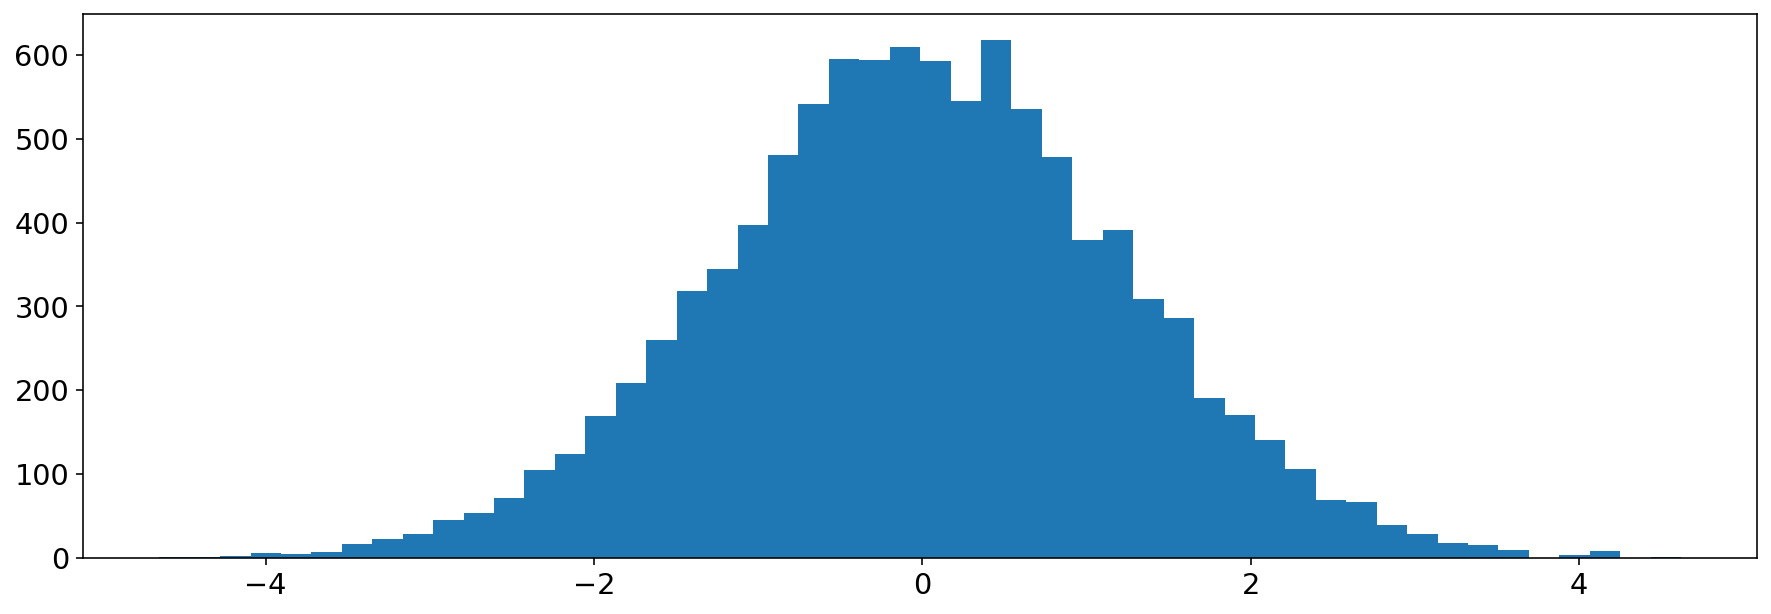

In [58]:
plt.hist(q,50)

In [ ]:
nsample=10

Ndraws=10000
q=np.zeros(Ndraws)
for n in range(Ndraws):
    e1 = stats.norm(loc=0,scale=10).rvs(size=nsample)
    e2 = stats.norm(loc=0,scale=10).rvs(size=nsample)
    q[n]=np.mean(e1)-np.mean(e2)

In [ ]:
plt.hist(q,50)

In [ ]:
q